In [1]:
import seaborn as sns
import numpy as np
import skimage.io
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten
from keras.utils import np_utils


Using TensorFlow backend.


In [58]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

In [96]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

itr = train_generator = train_datagen.flow_from_directory(
        'data/training',
        target_size=(28, 28),
        batch_size=60000,
        class_mode='binary')

test = test_generator = test_datagen.flow_from_directory(
        'data/testing',
        target_size=(28,28),
        batch_size=10000,
        class_mode='binary')


Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [97]:
X,Y = itr.next()

In [98]:
X.shape

(60000, 28, 28, 3)

In [99]:
Y.shape

(60000,)

In [100]:
X = np.array(X)
Y = np.array(Y)

In [101]:
X.shape

(60000, 28, 28, 3)

In [123]:
trainX, validationX, trainY, validationY = train_test_split(X,
                                Y, train_size=0.9, test_size=0.1, random_state = 0)

In [131]:
trainY.shape

(54000,)

In [110]:
validationX.shape

(6000, 28, 28, 3)

In [105]:
testX, testY = test.next()

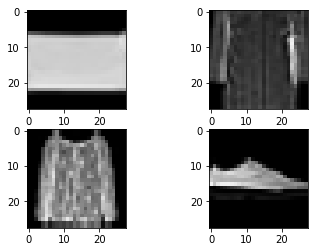

In [124]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(trainX[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(trainX[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(trainX[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(trainX[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [111]:
model = Sequential()

In [112]:
model.add(Dense(350, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [113]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [132]:
model.fit_generator(generator=train_generator,
                    validation_data=test_generator,
                    epochs=10
)

Epoch 1/10


ValueError: Error when checking input: expected dense_20_input to have 2 dimensions, but got array with shape (60000, 28, 28, 3)

In [ ]:
model.evaluate_generator(generator=test_generator
)

In [114]:
model.fit(trainX, trainY,
validation_data=(validationX,validationY), epochs=5)

ValueError: Error when checking input: expected dense_20_input to have 2 dimensions, but got array with shape (54000, 28, 28, 3)

In [13]:
'''    import os 
    import numpy as np 
    from keras.preprocessing import image
     
    PATH = os.getcwd()
     
    train_path = PATH+'\\data\\training'
    train_batch = os.listdir(train_path)
    x_train = []
     
    # if data are in form of images
    for sample in train_data:
        img_path = train_path+sample
        x = image.load_img(img_path)
        # preprocessing if required
        x_train.append(x)
     
    test_path = PATH+'\\data\\testing'
    test_batch = os.listdir(test_path)
    x_test = []
     
    for sample in test_data:
        img_path = test_path+sample
        x = image.load_img(img_path)
        # preprocessing if required
        x_test.append(x)
    
    # finally converting list into numpy array
    x_train = np.array(x_train)
    x_test = np.array(x_test)'''

NameError: name 'train_data' is not defined